In [111]:
import numpy as np

In [264]:
# nums = np.random.randn(300)
nums = np.linspace(-1,1,200)
# nums = np.concatenate((nums,np.linspace(10,14,100)))
nums = np.sort(nums)
nums

array([-1.        , -0.98994975, -0.9798995 , -0.96984925, -0.95979899,
       -0.94974874, -0.93969849, -0.92964824, -0.91959799, -0.90954774,
       -0.89949749, -0.88944724, -0.87939698, -0.86934673, -0.85929648,
       -0.84924623, -0.83919598, -0.82914573, -0.81909548, -0.80904523,
       -0.79899497, -0.78894472, -0.77889447, -0.76884422, -0.75879397,
       -0.74874372, -0.73869347, -0.72864322, -0.71859296, -0.70854271,
       -0.69849246, -0.68844221, -0.67839196, -0.66834171, -0.65829146,
       -0.64824121, -0.63819095, -0.6281407 , -0.61809045, -0.6080402 ,
       -0.59798995, -0.5879397 , -0.57788945, -0.5678392 , -0.55778894,
       -0.54773869, -0.53768844, -0.52763819, -0.51758794, -0.50753769,
       -0.49748744, -0.48743719, -0.47738693, -0.46733668, -0.45728643,
       -0.44723618, -0.43718593, -0.42713568, -0.41708543, -0.40703518,
       -0.39698492, -0.38693467, -0.37688442, -0.36683417, -0.35678392,
       -0.34673367, -0.33668342, -0.32663317, -0.31658291, -0.30

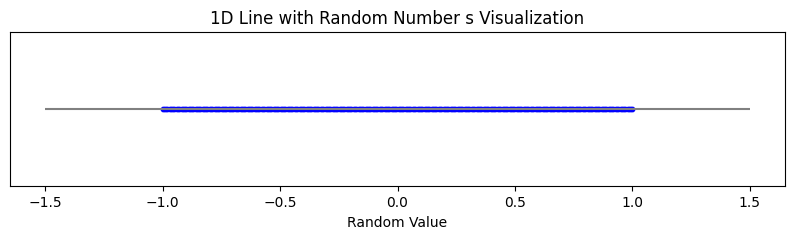

In [265]:
import matplotlib.pyplot as plt

# nums의 최소값과 최대값 구하기
min_num = np.min(nums)
max_num = np.max(nums)

# 1차원 선 그리기
plt.figure(figsize=(10, 2))
plt.hlines(1, min_num-0.5, max_num+0.5, colors='gray', linestyles='solid')  # 수평선 그리기

# nums 값들을 선 위에 점으로 시각화
plt.scatter(nums, np.ones_like(nums), color='b', s=10)  # 점들을 선 위에 표시

plt.title('1D Line with Random Number s Visualization')
plt.xlabel('Random Value')
plt.yticks([])  # y축은 비우기 (1차원 느낌을 주기 위해)
plt.show()

In [180]:
# def gaussian(x, mean):
#     return np.exp(-(x - mean)**2)

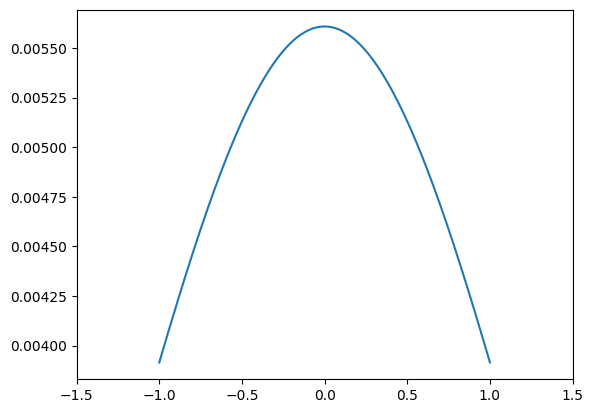

In [266]:
from scipy.stats import norm

dens = []

for num in nums:
    sum_p = 0
    # 여기에 가우시안 넣어야 될듯
    for num2 in nums:
        if num != num2:
            # gaussian 커널로 점들간 거리에 따라 확률추정
            p = norm.pdf(num-num2)
            # 점 num에서 확률추정
            sum_p += p

    dens.append(sum_p / (len(nums)-1))

dens /= np.sum(dens)
  
plt.xlim([min_num-0.5, max_num+0.5])
plt.plot(nums, dens)
# plt.hist(nums, density=True, bins=100)

In [253]:
sum(dens)

0.9999999999999999